In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor,plot_importance, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

c:\Users\Krioha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_excel("D:\Data Machinelearning\Time Series Forcasting Pengunaan listrik perkapita indonesia\konsumsi-listrik-penduduk-indonesia-naik-pada-2022-capai-rekor-baru.xlsx")
df.head()

,date,Konsumsi Listrik per Kapita Indonesia
0,1971,14.30
1,1972,15.83
2,1973,15.76
3,1974,19.11
4,1975,21.36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   52 non-null     int64  
 1   Konsumsi Listrik per Kapita Indonesia  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [4]:
df['date']=pd.to_datetime(df['date'],format='%Y')

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   52 non-null     datetime64[ns]
 1   Konsumsi Listrik per Kapita Indonesia  52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes
None
        date  Konsumsi Listrik per Kapita Indonesia
0 1971-01-01                                  14.30
1 1972-01-01                                  15.83
2 1973-01-01                                  15.76
3 1974-01-01                                  19.11
4 1975-01-01                                  21.36


In [6]:
df.set_index('date',inplace=True)
df.head()

,Konsumsi Listrik per Kapita Indonesia
date,
1971-01-01,14.30
1972-01-01,15.83
1973-01-01,15.76
1974-01-01,19.11
1975-01-01,21.36


In [7]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)

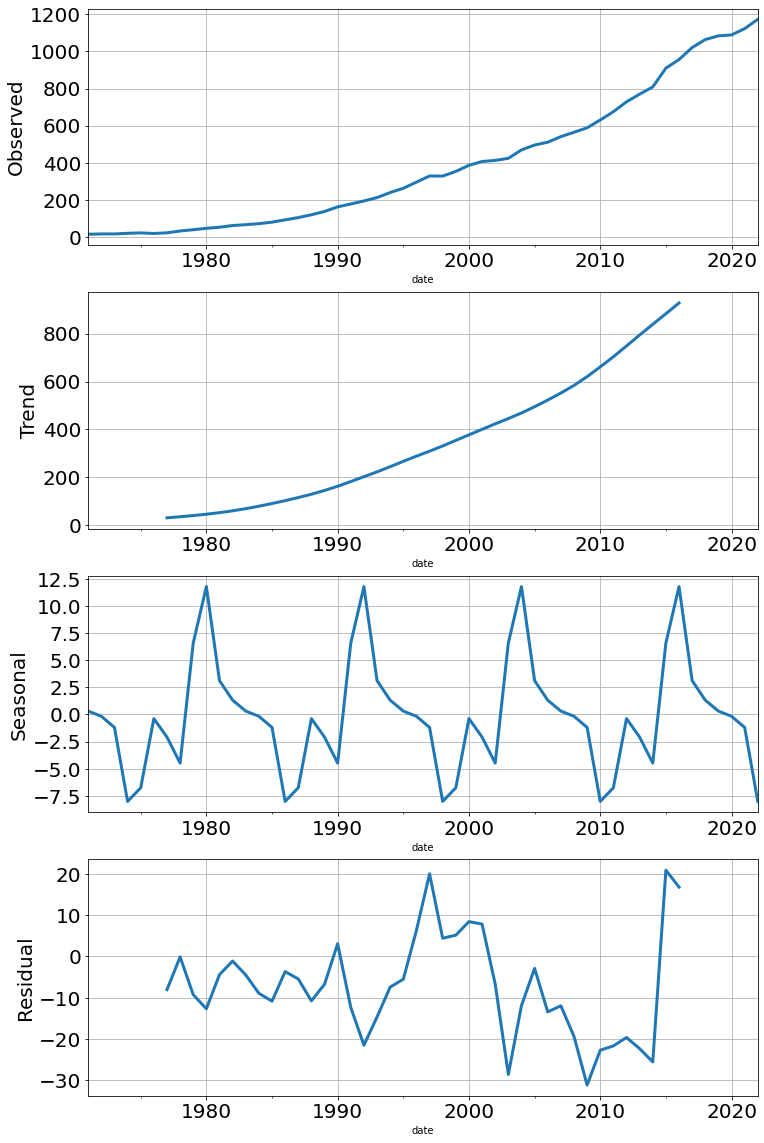

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=12) 
plot_decompose(decomposition)

In [10]:
from pmdarima import auto_arima
# Membuat model ARIMA
stepwise_fit=auto_arima(df,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=421.976, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=429.016, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=423.647, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=417.016, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=418.242, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=418.211, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=420.199, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.449 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -206.508
Date:                Wed, 25 Oct 2023   AIC                            417.016
Time:                        13:38:24   BIC                            420.840
Sample:                    01-01-1971   HQIC                           418.472
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6600      0.107     -6.171      0.000      -0.870      -0.450
sigma2       223.8584     26.136      8.565      0.000     172.634     275.083
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                46.14
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):              31.11   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat model ARIMA
order = (0,2,1)  # Nilai ini didapat dari pengujian autoarima terbaik
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Melakukan prediksi pada data uji
predictions = model_fit.forecast(steps=len(test_data))

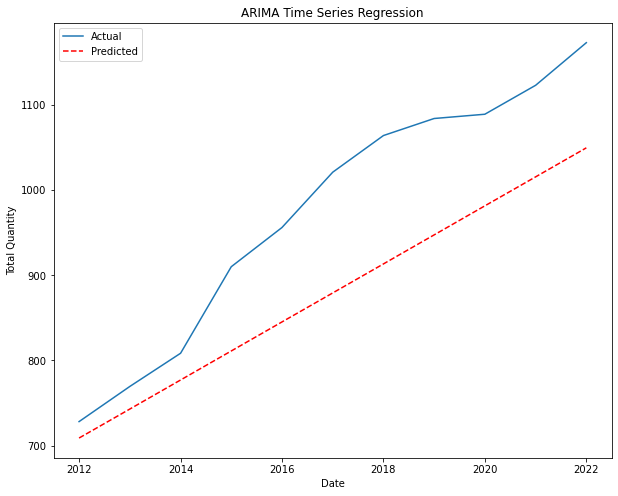

In [12]:
plt.figure(figsize=(10,8))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted',linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('ARIMA Time Series Regression')
plt.legend()
plt.show()

In [13]:
# Menghitung nilai matriks performansi

rmsearima = sqrt(mean_squared_error(test_data, predictions))
msearima = mean_squared_error(test_data, predictions)
maearima= mean_absolute_error(test_data, predictions)
mapearima = mean_absolute_percentage_error(test_data, predictions)

print('Nilai RMSE :', rmsearima)
print('Nilai MSE :', msearima)
print('Nilai MAE :', maearima)
print('Nilai MAPE :', mapearima)


Nilai RMSE : 106.15856486864023
Nilai MSE : 11269.640894969294
Nilai MAE : 95.86892743394351
Nilai MAPE : 0.09369973167204858


# Prophet Time Series

In [14]:
train_data.reset_index() \
    .rename(columns={'date':'ds',
                     'Konsumsi Listrik per Kapita Indonesia':'y'}).head()

,ds,y
0,1971-01-01,14.30
1,1972-01-01,15.83
2,1973-01-01,15.76
3,1974-01-01,19.11
4,1975-01-01,21.36


In [15]:
model = Prophet()
model.fit(train_data.reset_index() \
                  .rename(columns={'date':'ds',
                     'Konsumsi Listrik per Kapita Indonesia':'y'}))

13:38:26 - cmdstanpy - INFO - Chain [1] start processing
13:38:26 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
test_results=model.predict(df=test_data.reset_index() \
                                   .rename(columns={'date':'ds'}))

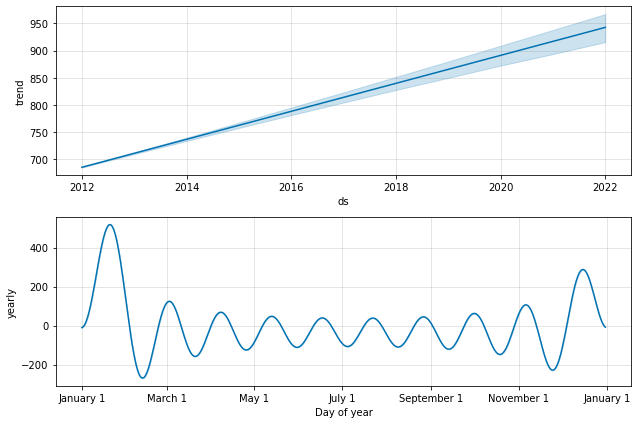

In [17]:
fig = model.plot_components(test_results)

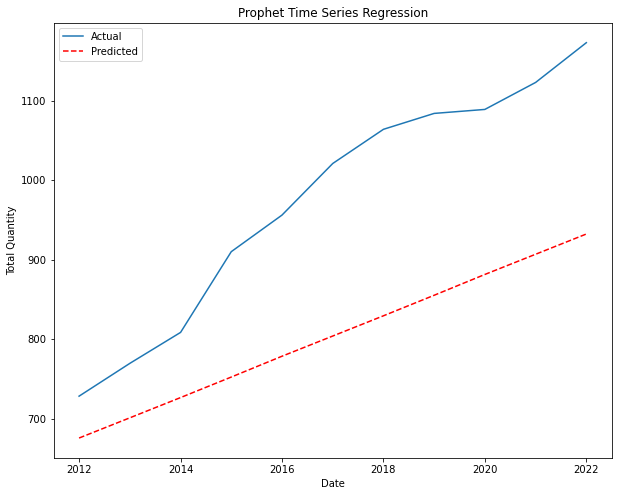

In [18]:
plt.figure(figsize=(10,8))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, test_results['yhat'], label='Predicted',linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Prophet Time Series Regression')
plt.legend()
plt.show()

In [19]:
# Menghitung nilai matriks performansi

rmsearima = sqrt(mean_squared_error(test_data, test_results['yhat']))
msearima = mean_squared_error(test_data, test_results['yhat'])
maearima= mean_absolute_error(test_data, test_results['yhat'])
mapearima = mean_absolute_percentage_error(test_data, test_results['yhat'])

print('Nilai RMSE :', rmsearima)
print('Nilai MSE :', msearima)
print('Nilai MAE :', maearima)
print('Nilai MAPE :', mapearima)

Nilai RMSE : 184.16062961758766
Nilai MSE : 33915.13750114631
Nilai MAE : 171.26506228203158
Nilai MAPE : 0.16862262998049518


# Xgbooost Time Series

In [20]:
dfx=pd.read_excel("D:\Data Machinelearning\Time Series Forcasting Pengunaan listrik perkapita indonesia\konsumsi-listrik-penduduk-indonesia-naik-pada-2022-capai-rekor-baru.xlsx")
dfx.head()

,date,Konsumsi Listrik per Kapita Indonesia
0,1971,14.30
1,1972,15.83
2,1973,15.76
3,1974,19.11
4,1975,21.36


In [21]:
train_size = int(0.8 * len(dfx))
train_dataxgb = dfx[:train_size]
test_dataxgb = dfx[train_size:]


In [22]:
X_train = train_dataxgb.drop(['Konsumsi Listrik per Kapita Indonesia'], axis=1)
y_train = train_dataxgb['Konsumsi Listrik per Kapita Indonesia']
X_test = test_dataxgb.drop(['Konsumsi Listrik per Kapita Indonesia'], axis=1)
y_test = test_dataxgb['Konsumsi Listrik per Kapita Indonesia']

In [23]:
reg=XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
y_pred = reg.predict(X_test)

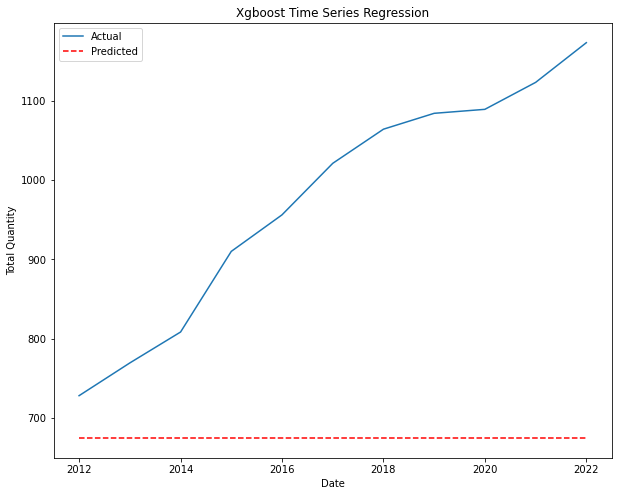

In [25]:
plt.figure(figsize=(10,8))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted',linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Xgboost Time Series Regression')
plt.legend()
plt.show()

In [26]:
# Menghitung nilai matriks performansi
maexgb = mean_absolute_error(y_test, y_pred)
rmsexgb = sqrt(mean_squared_error(y_test, y_pred))
msexbg = mean_squared_error(y_test, y_pred)
mapeexgb = mean_absolute_percentage_error(y_test, y_pred)

print('Nilai RMSE :', rmsexgb)
print('Nilai MSE :', msexbg)
print('Nilai MAE :', maexgb)
print('Nilai MAPE :', mapeexgb)



Nilai RMSE : 333.4889976366115
Nilai MSE : 111214.91154467188
Nilai MAE : 300.2812133789062
Nilai MAPE : 0.2909623638233659


In [27]:
df_acc=pd.DataFrame(
{u'Arima': {0: 106.15,1:95.86,2:9.37},
 u'Prophet': {0: 184.16,1: 171.26,2:16.86},
 u'Xgboost': {0: 333.48,1: 300.28,2:29.09},
 u'Metrics': {0: u'RMSE',1: u'MAE',2: u'MAPE'}}
)
df_acc = df_acc.set_index('Metrics')

Text(0, 0.5, 'Performance Lower is Better')

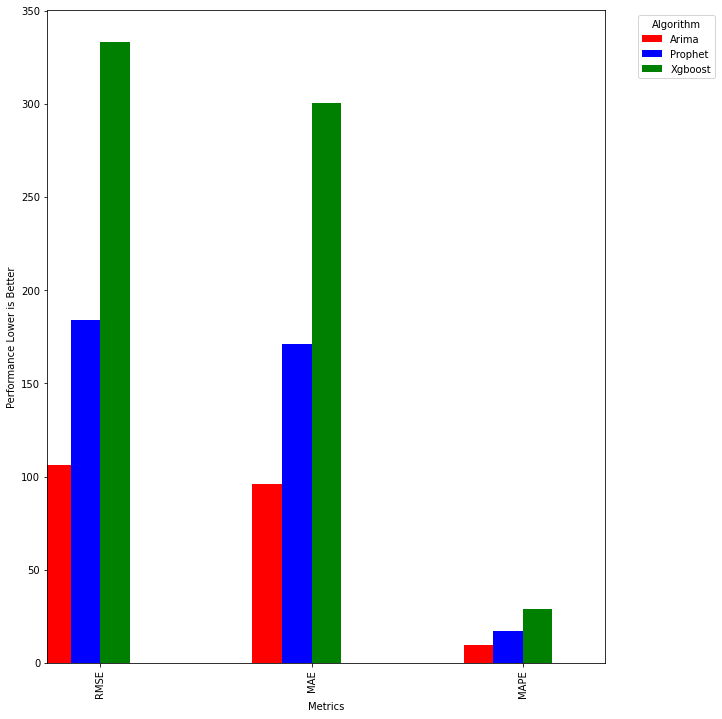

In [28]:
fig = plt.figure(figsize=(10,12)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .14

df_acc.Arima.plot(kind='bar', color='red', ax=ax, width=width, position=2)
df_acc.Prophet.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
df_acc.Xgboost.plot(kind='bar', color='green', ax=ax, width=width, position=0)

ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel('Performance Lower is Better')

Text(0, 0.5, 'Jumlah penggunaan listrik perkapita')

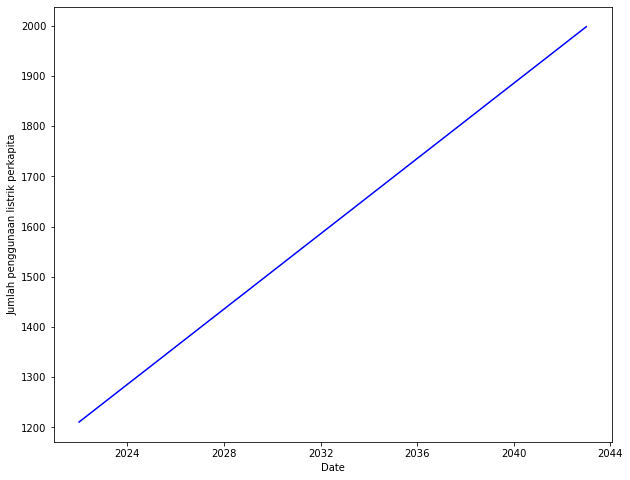

In [29]:
#make program to predict
datet=[]
tahun=input('Masukan tahun yang akan di prediksi : ')
tahun=int(tahun)
while tahun <= 2022:
    print('Tahun yang anda masukan salah')
    tahun=input('Masukan tahun yang akan di prediksi : ')    
tahun=int(tahun)
while tahun >= 2022:
    datet.append(tahun)
    tahun=tahun-1
datet=pd.DataFrame(datet)
datet.columns=['date']
datet['date']=pd.to_datetime(datet['date'],format='%Y')
datet.set_index('date',inplace=True)
datet.sort_index(inplace=True)

# Membuat model ARIMA
order = (0,2,1)  # Nilai ini didapat dari pengujian autoarima terbaik
model = ARIMA(df, order=order)
model_fit = model.fit()

# Melakukan prediksi pada data uji
predictions = model_fit.forecast(steps=len(datet))

#tampilkan time series hasil prediksi'
datet.reset_index(inplace=True)
plt.figure(figsize=(10,8))
plt.plot(datet['date'], predictions, label='Predicted', color='blue')
plt.xlabel('Date')
plt.ylabel('Jumlah penggunaan listrik perkapita')

In [ ]:
import pickle
pickle.dump(model_fit, open('model.pkl','wb'))
